In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Motivating Example

- Let's first define what a **random process/stochastic process** means
    - Think of a random process as some function that varies with time $t$
        - It can vary in continuous time steps, so the process is denoted as $x(t)$
        - It can also vary in discrete time steps, so the process is denoted as $x[n]$

- We typically model these random processes as a random function $X(t)$
    - These are called "random" processes becaues at each time step, the exact value is random (not deterministic)

- Think about it this way
    - Imagine a cumulative counter $C$ for winning a roulette bet. 
    - Let $X_i$ represent the outcome of the i-th spin. So $X_5$ denotes the outcome of the 5th spin
    - Quite clearly, $C$ is a function of $i$
        - If $i < 10$, $C < 10$. You cannot possibly win 10 times if you have spun fewer than 10 times
    - But aside from the condition $0 <= i < 10$, $C$ can take on any range of values! And there is no way to determine with certainty what $C$ will be at step $i$
    - So at every value of $i$, $C$ follows some sum of individual Poisson distribututions! And as $i$ increases, the possible distribution of $C$ also changes
    
- So far, what we have studied applies to the distribution $X(t = C)$ when $t$ takes on some specific value. Now, we want to study the evolution of the values over time!

## Theory

- **Definition 47.1 (Random Process)**: A random process is a collection of random variables $\{X_t\}$ indexed by time. Every realisation of the process is a function of $t$. For every value of $t$, $X_t$ is a random variable
    - Random processes are **continuous-time** $\{X(t)\}$ or **discrete-time** $\{X[n]\}$. 

### Example 47.1 (Poisson Process)

- The Poisson process, introduced in Lesson 17, is a continuous-time random process. Let's define $N(t)$ to be the number of arrivals up to time $t$. Then, $\{N(t); t > 0\}$ is a continuous time random process
- Using the notatio above, the following properties are true of a Poisson process
    - $N(0) = 0$
        - Up till time 0, no arrivals could have taken place because time starts at 0 by definition
    - $N(t_1) - N(t_0) \sim \text{Poisson}(\lambda (t_1 - t_0))$
        - The difference in counts at $t_1$ and $t_0$ simply follows the same Poisson distribution for the time interval $t_1 - t_0$
    - $N(t_1) - N(t_0)$ is independent from $N(t_2) - N(t_1)$
        - The count of arrivals in non overlapping intervals are independent

- Let's see what this looks like in a plot
    - Each line represents 1 **instantiation** of the process
    - It is a discrete time process, because every "time unit" is distinct

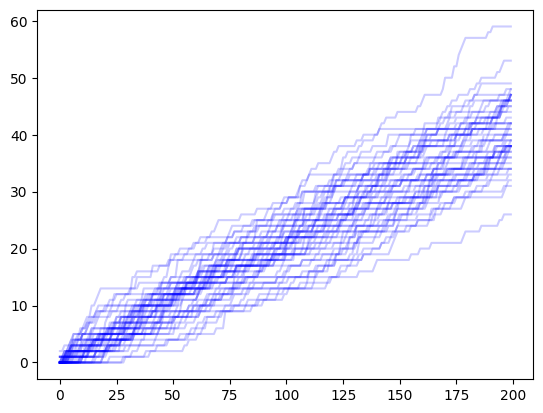

In [21]:
LAM = 0.2
INSTANTIATIONS = 50
STEPS = 200
poisson_process_instantiations = [np.random.poisson(lam=LAM, size=STEPS).cumsum() for _  in range(INSTANTIATIONS)]

for i in range(INSTANTIATIONS):
    plt.plot(poisson_process_instantiations[i], alpha=0.2, color='blue')

### Example 47.2 (White Noise)

- We studied IID variables in sections 32 and 46. A sequence of IID random variables is simply called **white noise**
- This is a discrete time process
- Again, let's simulate what it looks like

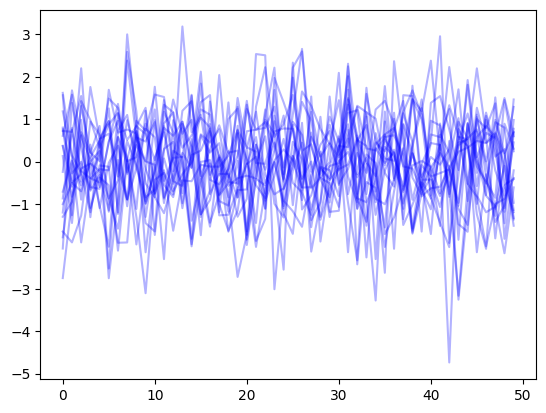

In [32]:
MU = 0
SIGMA = 1
STEPS = 50
INSTANTIATIONS = 20
white_noise_process = [np.random.normal(MU, SIGMA, size=STEPS) for _ in range(INSTANTIATIONS)]

for i in range(INSTANTIATIONS):
    plt.plot(white_noise_process[i], alpha=0.3, color='blue')

### Example 47.3 (Random Walk)

- In Lesson 31, we looked at a simple random walk 
- In general, a random walk $X[n]; n \ge 0$ is a discrete time process defined by $$\begin{align}X[0] &= 0 \\ X[n] &= X[n-1] + Z[n] & n \ge 1\end{align}$$
    - where $\{Z[n]\}$ is a white noise process
    - So each step is an IID draw from the same distribution
- Let's work out $X[n]$ for each value of $n$
    - $X[0] = 0$ 
    - $X[1] = X[0] + Z[1] = Z[1]$
    - $X[2] = X[1] + Z[2] = Z[1] + Z[2]$  
    - $X[3] = ...$
- In a simple random walk, each Z has 50% chance of returning -1, and 50% chance of returning 1.

- Simulating

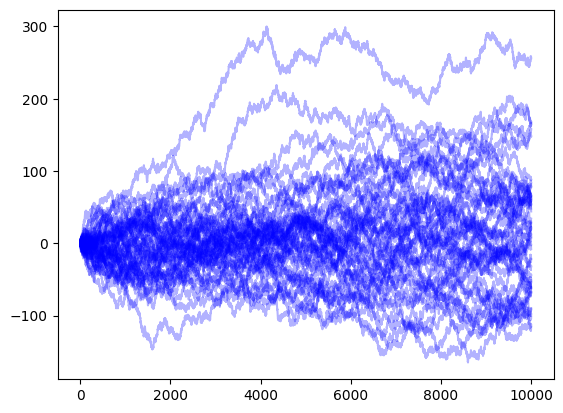

In [11]:
STEPS = 10000
INSTANTIATIONS = 50

random_walks = [np.random.choice([-1,1], size=STEPS).cumsum() for _ in range(INSTANTIATIONS)]

for i in range(INSTANTIATIONS):
    plt.plot(random_walks[i], alpha=0.3, color = 'blue')